In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Exploratory Data Analysis (EDA):

# loading the dataset

In [2]:
df=pd.read_csv(r"C:\Users\disha\Downloads\PCA\PCA\wine.csv")
print(df)

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  D

In [3]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

# summary statistics

In [4]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [6]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# histogram

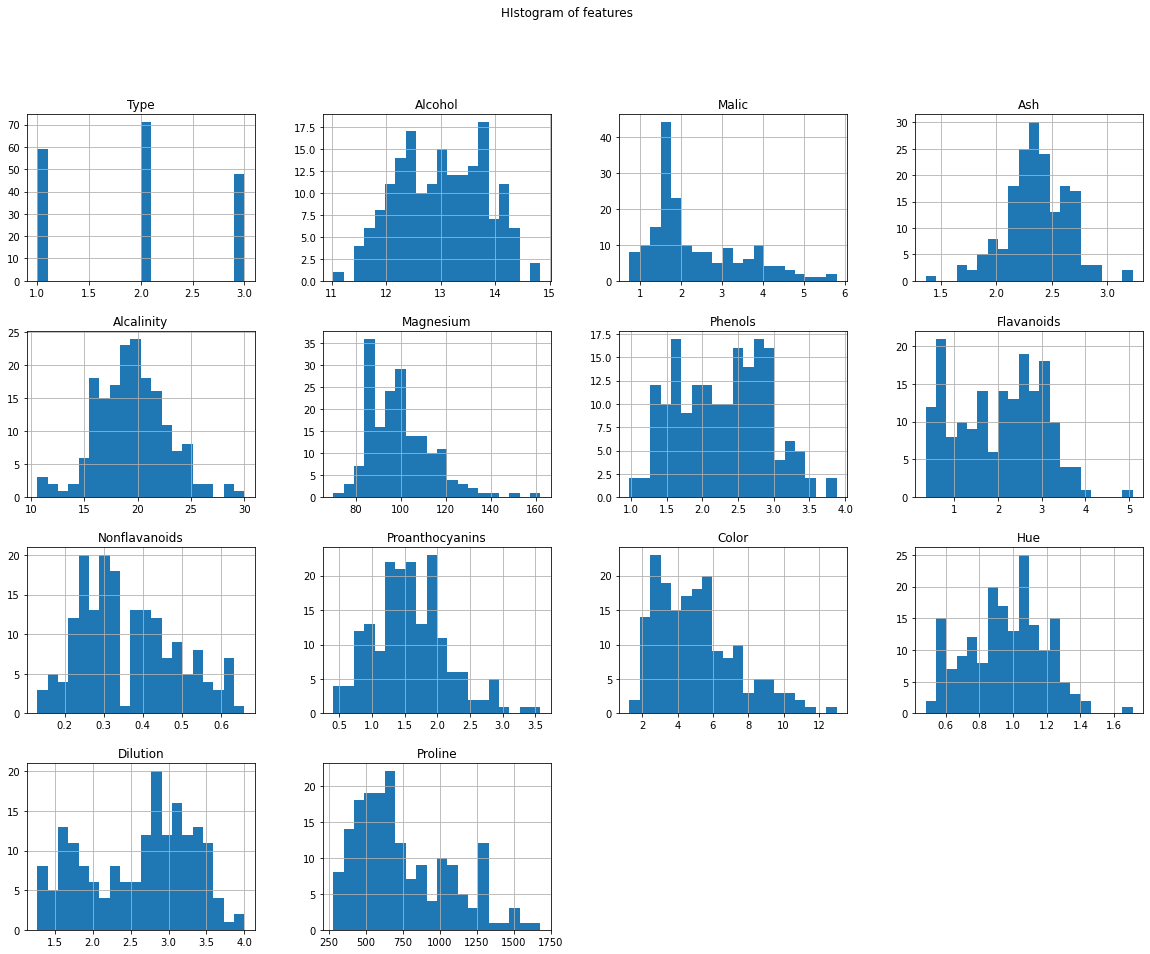

In [7]:
df.hist(bins=20, figsize=(20,15))
plt.suptitle("Histogram of features")
plt.show()

# boxplot

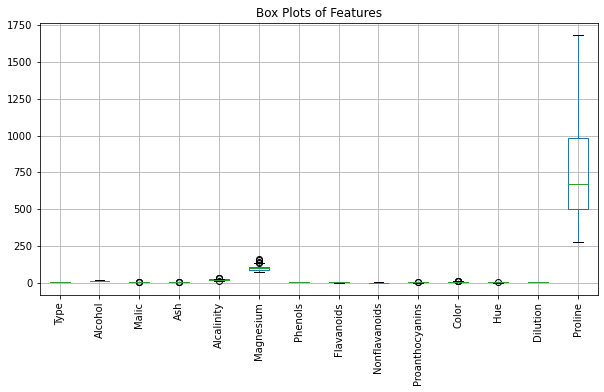

In [15]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.title("Box Plots of Features")
plt.xticks(rotation=90)
plt.show()

# Density plot

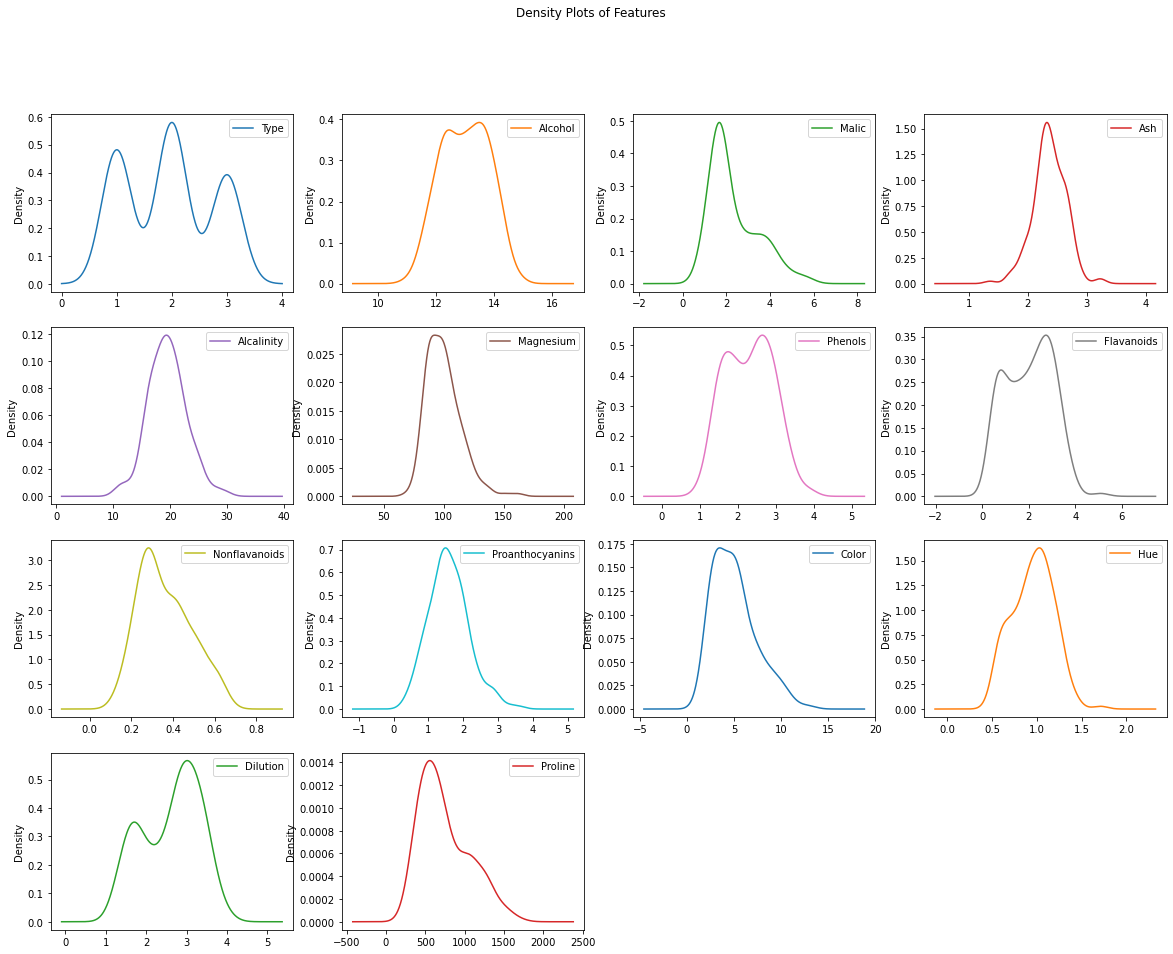

In [16]:
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(20, 15))
plt.suptitle("Density Plots of Features")
plt.show()

# Correlation matrix

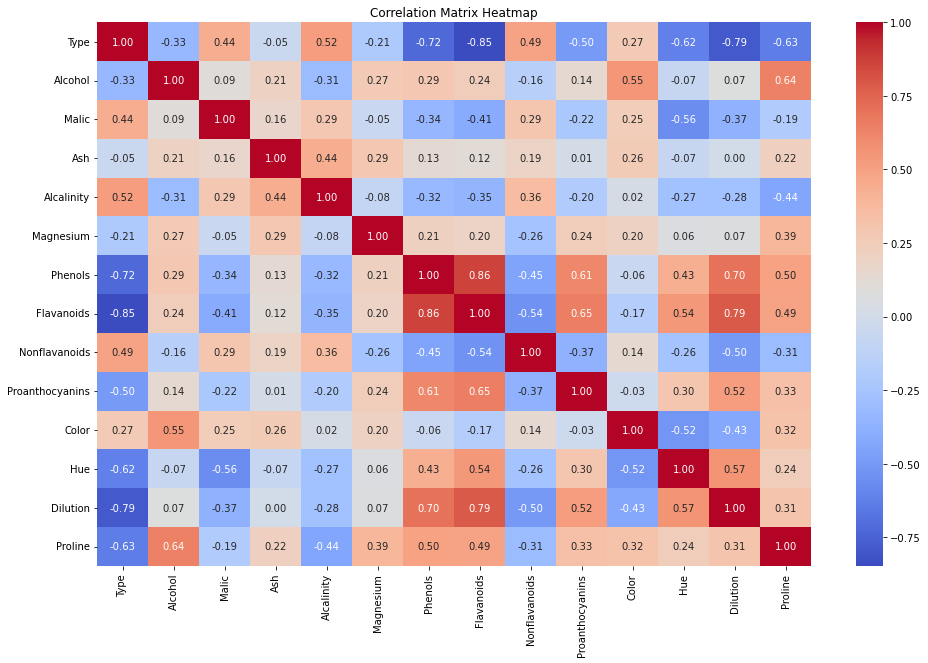

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Dimensionality Reduction with PCA:

# Standardize the Features

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print("Standardized Data (first 5 rows):")
print(scaled_data[:5])


Standardized Data (first 5 rows):
[[-1.21394365  1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522
   0.80899739  1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728
   1.84791957  1.01300893]
 [-1.21394365  0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502
   0.56864766  0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066
   1.1134493   0.96524152]
 [-1.21394365  0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836
   0.80899739  1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389
   0.78858745  1.39514818]
 [-1.21394365  1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845
   2.49144552  1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369
   1.18407144  2.33457383]
 [-1.21394365  0.29570023  0.22769377  1.84040254  0.45194578  1.28198515
   0.80899739  0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728
   0.44960118 -0.03787401]]


# Implementing PCA

In [22]:
pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance)


Explained Variance Ratio:
[0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458 0.00412945]


# Determining the Optimal Number of Principal Components

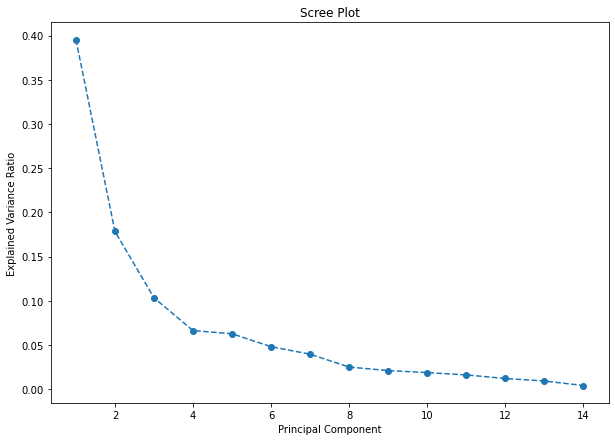

In [27]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

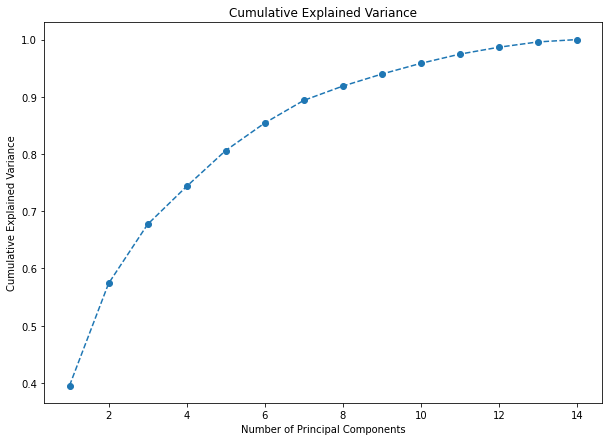

In [24]:
cumulative_explained_variance = explained_variance.cumsum()
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [25]:
num_components = next(i for i, total in enumerate(cumulative_explained_variance) if total >= 0.95) + 1
print(f"Number of components that explain at least 95% of the variance: {num_components}")

Number of components that explain at least 95% of the variance: 10


# Transforming the Original Dataset into the Principal Components

In [26]:
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])
print("Transformed Data (Principal Components) (first 5 rows):")
print(principal_df.head())

Transformed Data (Principal Components) (first 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.522934 -1.453098 -0.164795 -0.013273  0.737345 -0.300716  0.573876   
1 -2.528858  0.330019 -2.026707 -0.417144 -0.283214 -0.884309 -0.029716   
2 -2.785029 -1.036936  0.983238  0.664232 -0.387565  0.468842  0.488305   
3 -3.922588 -2.768210 -0.174968  0.565088 -0.324360  0.262616 -0.398364   
4 -1.407511 -0.867773  2.025829 -0.440906  0.227949 -0.593762  0.447876   

        PC8       PC9      PC10  
0  0.055637 -0.458765  1.065570  
1  1.010372  0.218806 -0.020182  
2 -0.268957  1.222769 -0.106249  
3  0.618844 -0.114658  0.107671  
4  0.434937 -0.261548  0.112434  


# Clustering with Original Data:

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(scaled_data)
labels = kmeans.labels_
df['Cluster'] = labels

In [32]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Cluster  
0           0.28             2.29   5.64  1.04      3.92     1065        1  
1           0.26             1.28   4.38  1.05      3.40     1050        1  
2           0.30             2.81   5.68  1.03      3.17     1185        1  
3           0.24             2.18   7.80  0.86      3.45     1480        1  
4           0.39             1.82   4.32  1.04      2.93      735        1

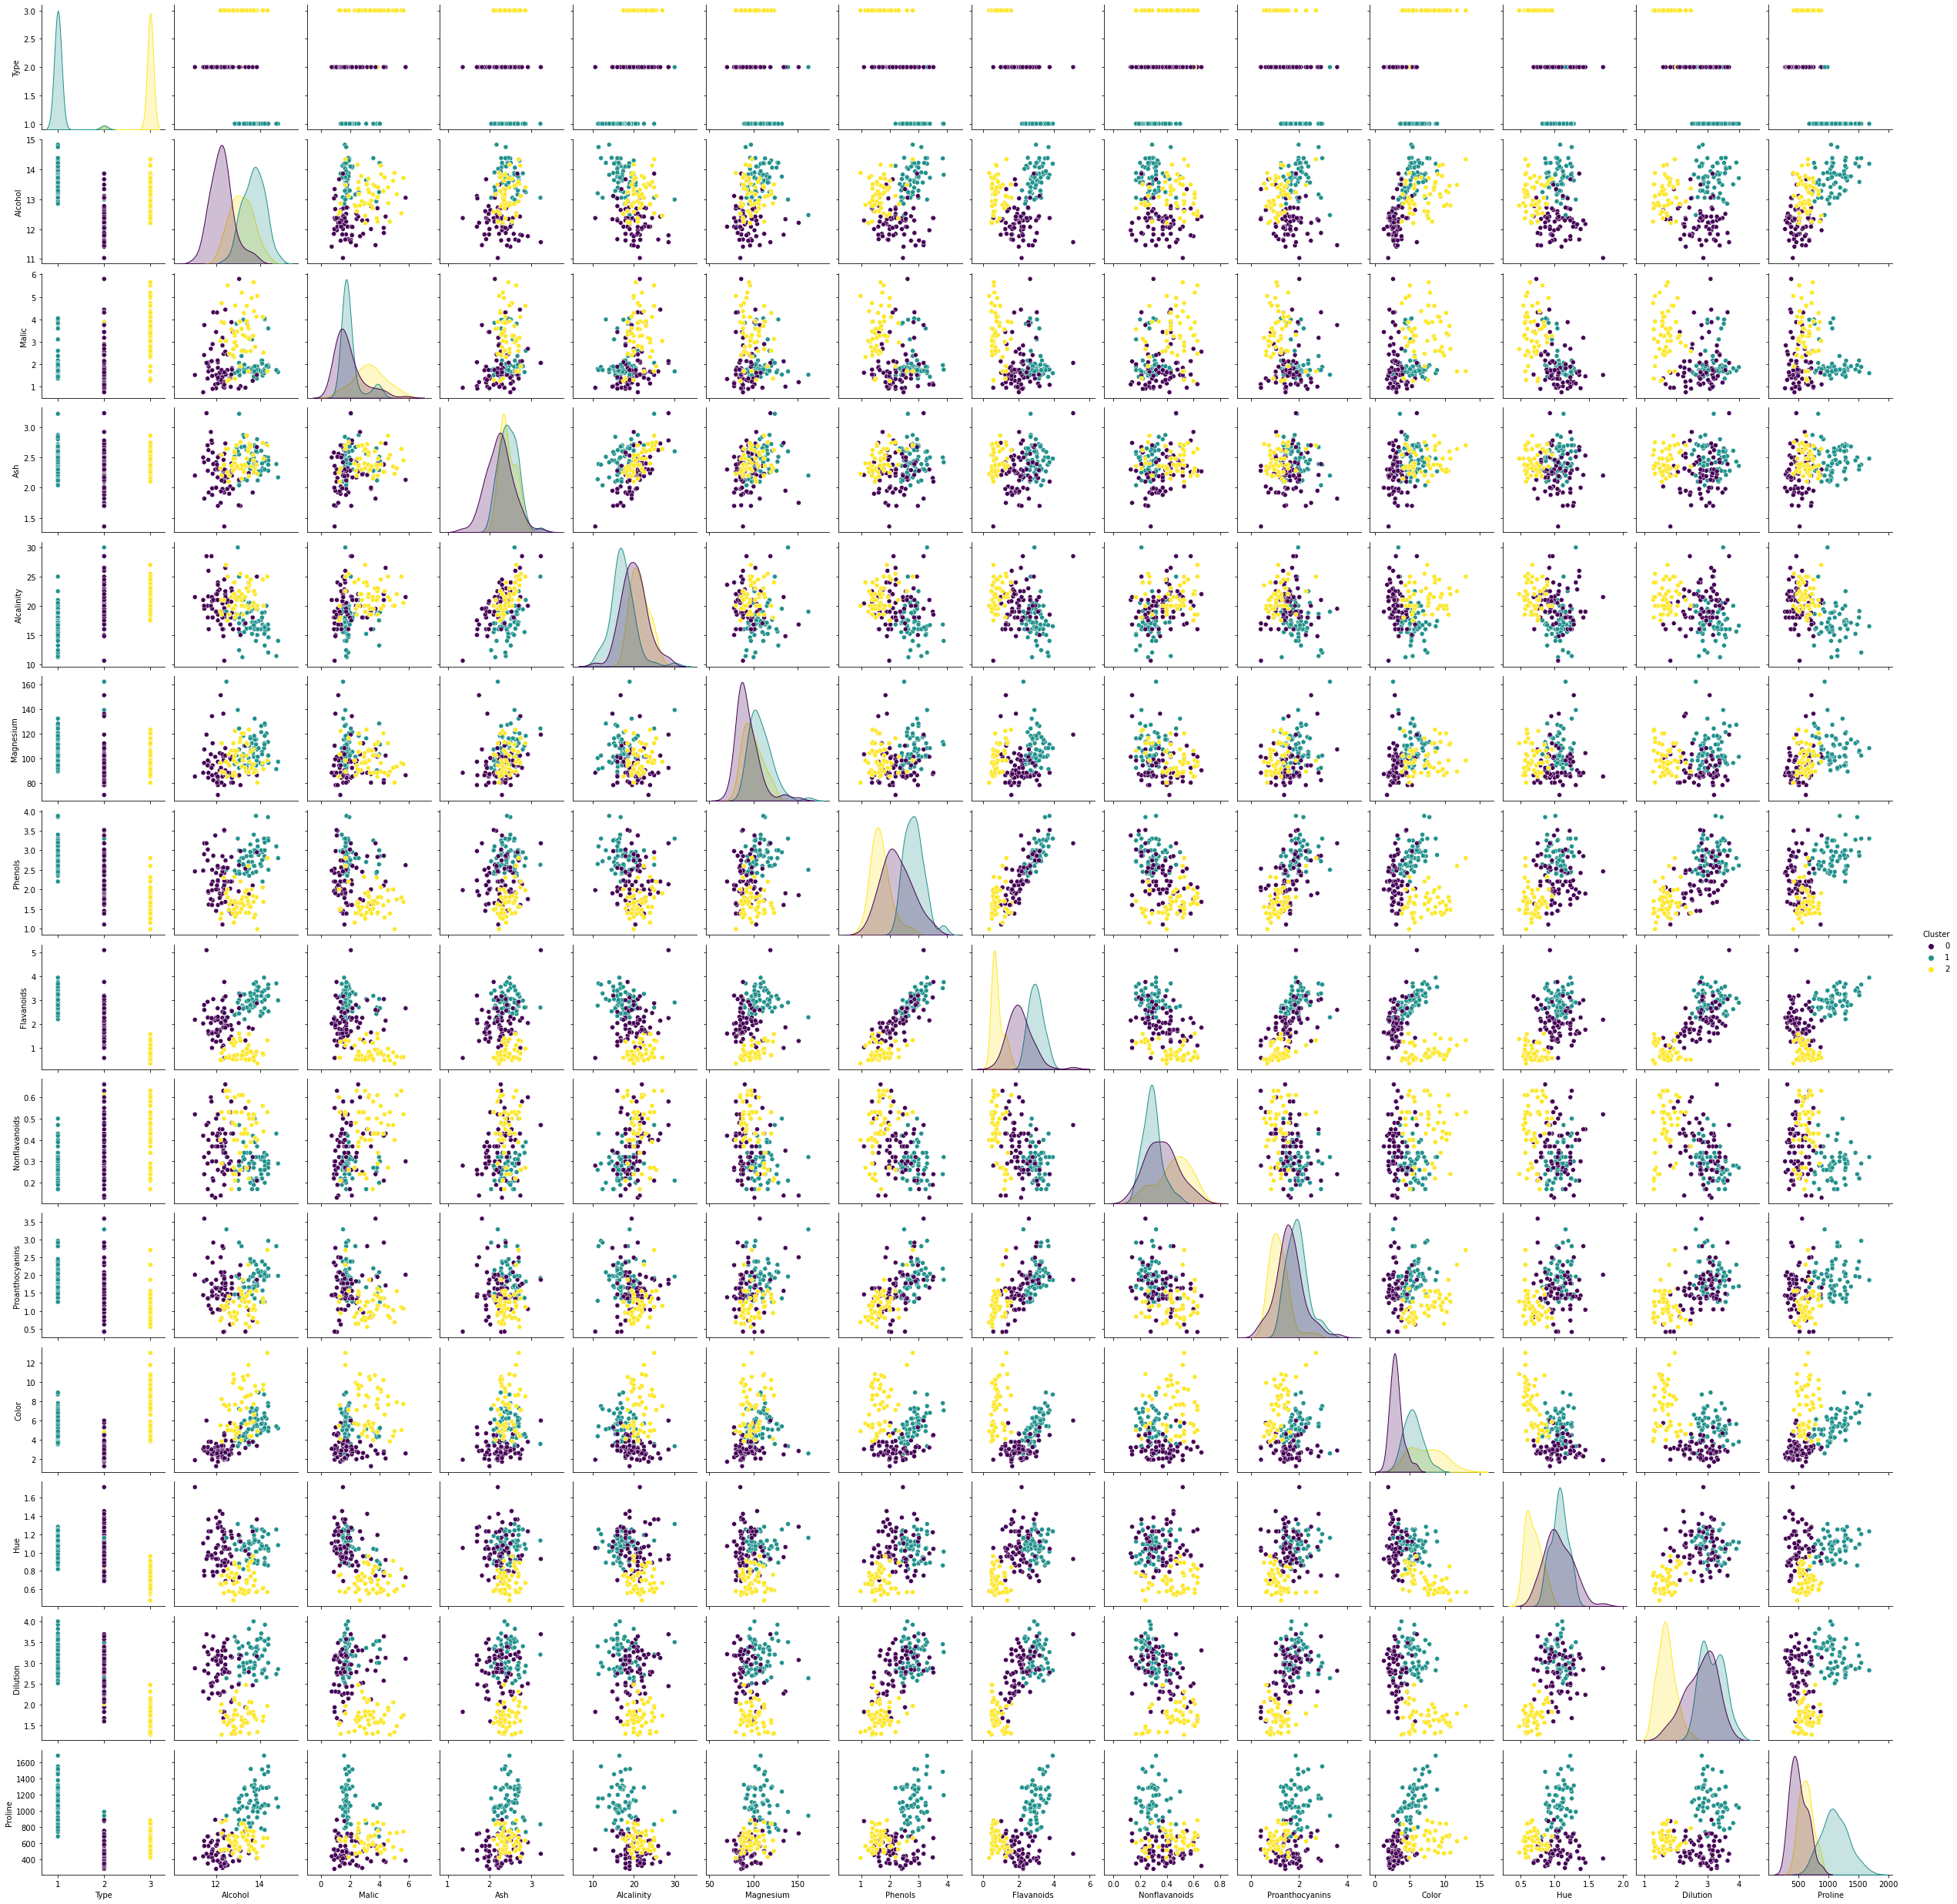

In [38]:
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

# silhouette score 

In [41]:
silhouette_avg = silhouette_score(scaled_data, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.30773604383565206


# Davies–Bouldin Index:

In [42]:
db_index = davies_bouldin_score(scaled_data, labels)
print(f'Davies–Bouldin Index: {db_index}')

Davies–Bouldin Index: 1.3163957434114109


# Clustering with PCA Data:

In [43]:
num_components = 10  # This number should be based on the previous analysis
pca = PCA(n_components=num_components)
pca_data = pca.fit_transform(scaled_data)

# Apply K-means clustering to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_data)

# Get the cluster labels for PCA-transformed data
pca_labels = kmeans_pca.labels_

# Add PCA cluster labels to the PCA-transformed data
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(num_components)])
pca_df['Cluster'] = pca_labels

In [44]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  Cluster  
0           0.28             2.29   5.64  1.04      3.92     1065        1  
1           0.26             1.28   4.38  1.05      3.40     1050        1  
2           0.30             2.81   5.68  1.03      3.17     1185        1  
3           0.24             2.18   7.80  0.86      3.45     1480        1  
4           0.39             1.82   4.32  1.04      2.93      735        1

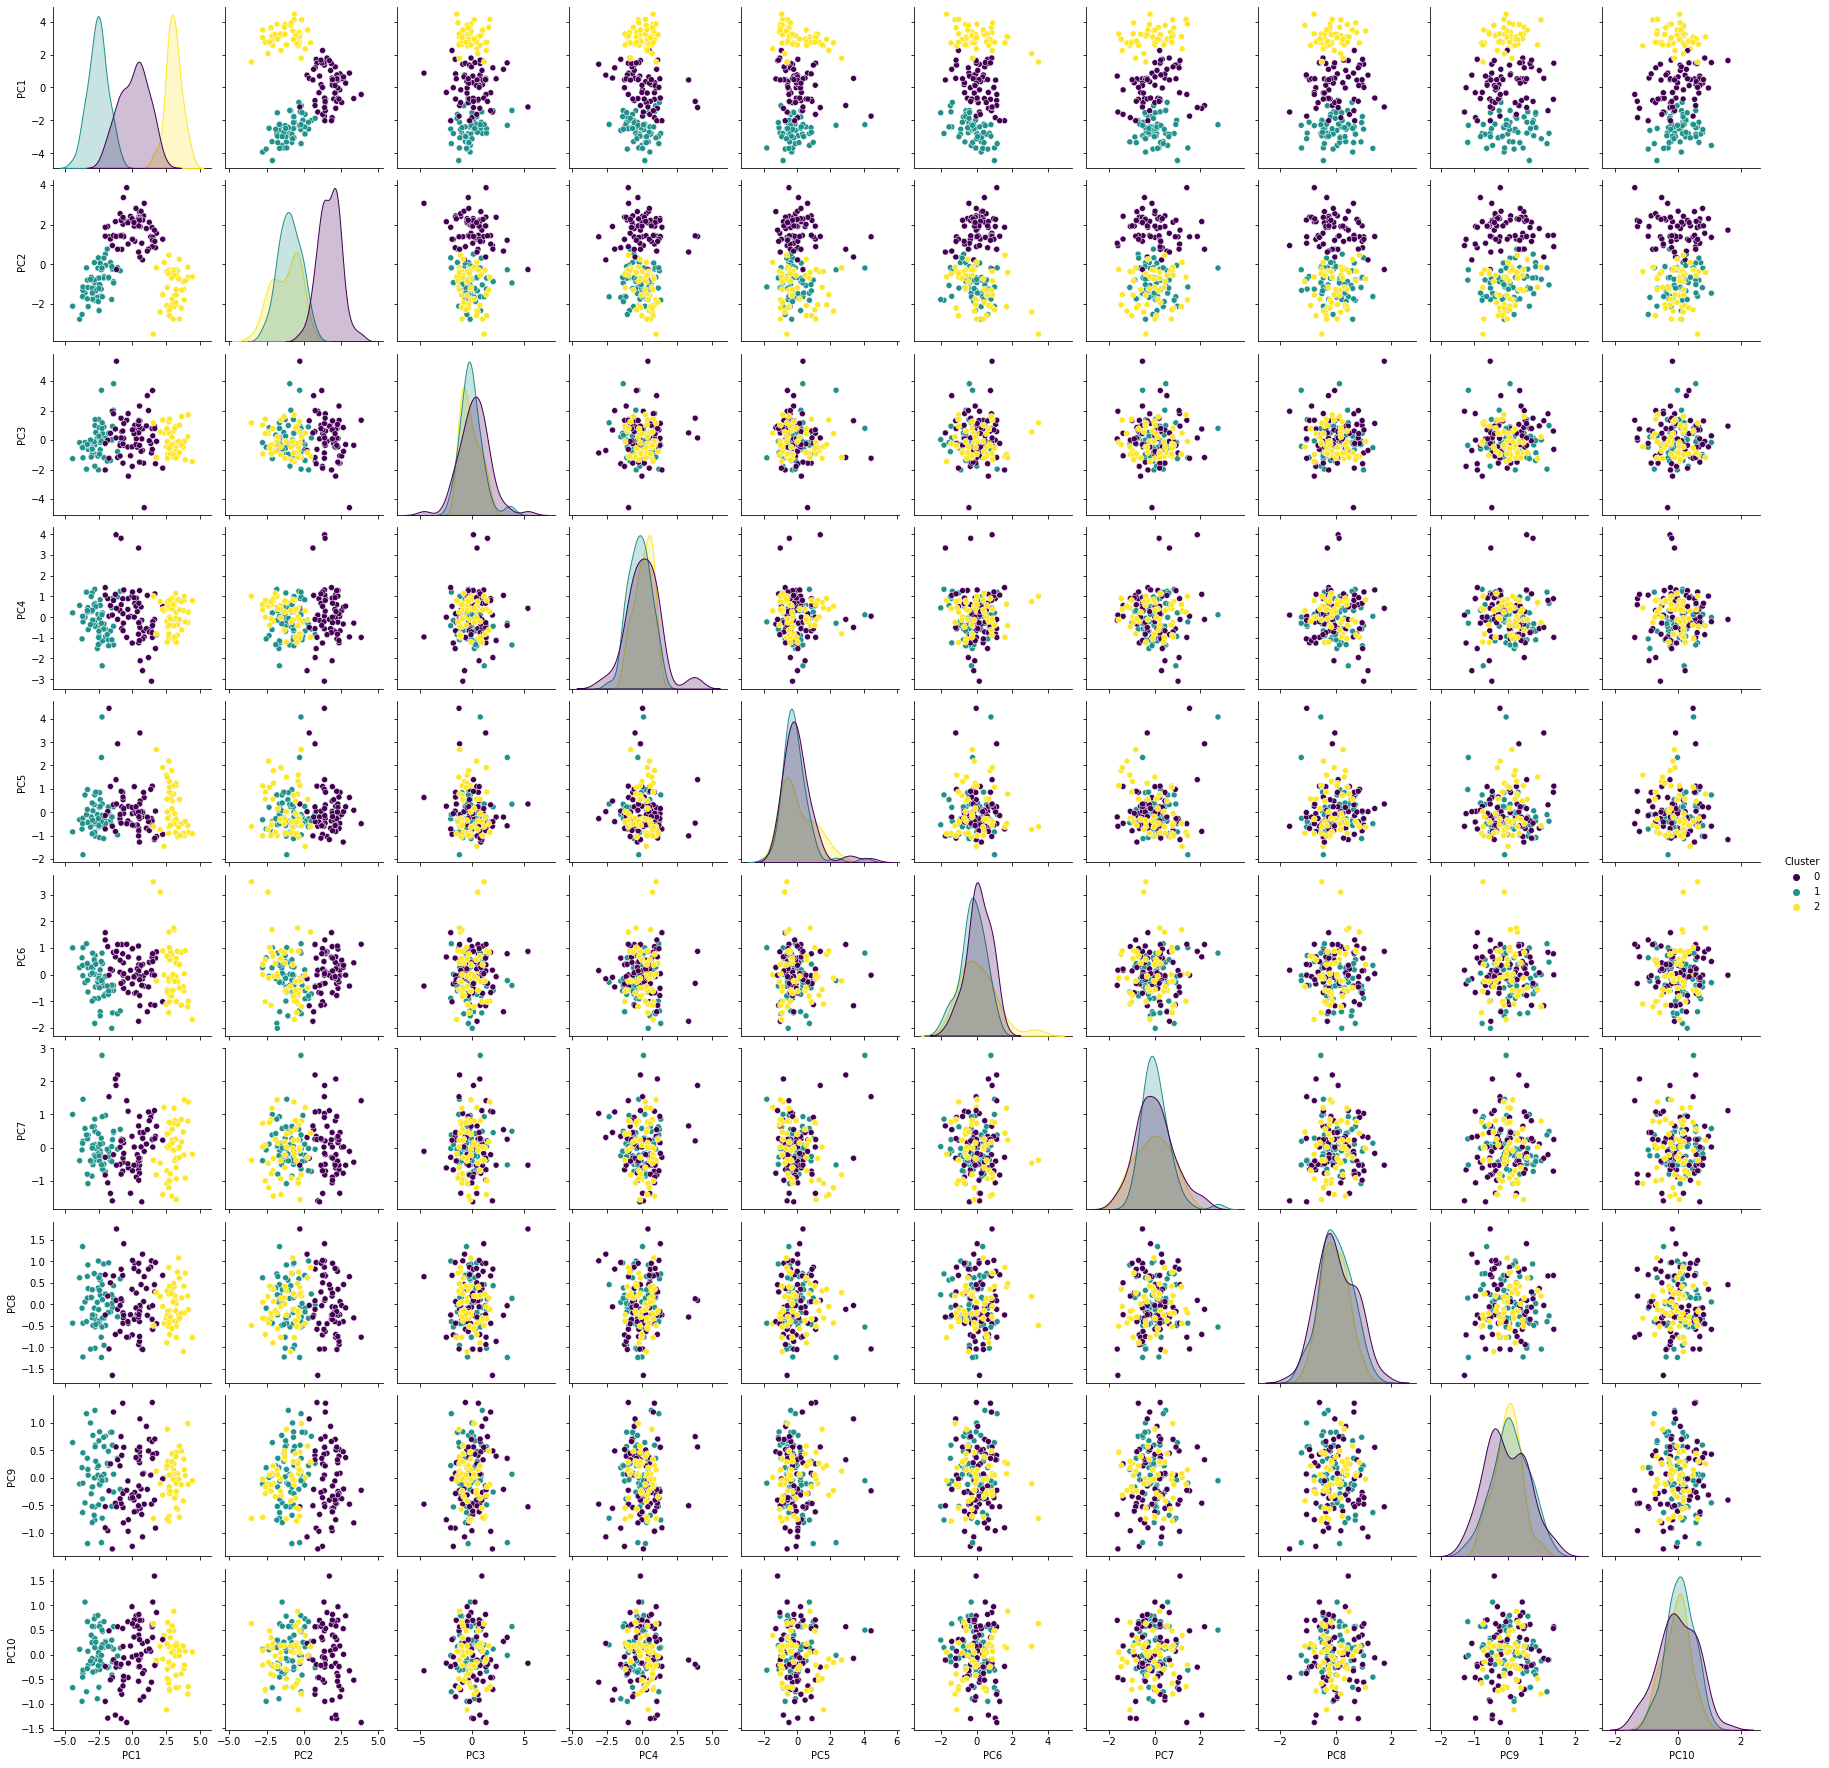

In [45]:
sns.pairplot(pca_df, hue='Cluster', palette='viridis')
plt.show()

# Silhouette Score for PCA Data

In [48]:
silhouette_pca = silhouette_score(pca_data, pca_labels)
print(f'Silhouette Score for PCA Data: {silhouette_pca}')

Silhouette Score for PCA Data: 0.32406582053311855


# Davies–Bouldin Index for PCA Data

In [47]:
db_index_pca = davies_bouldin_score(pca_data, pca_labels)
print(f'Davies–Bouldin Index for PCA Data: {db_index_pca}')

Davies–Bouldin Index for PCA Data: 1.2584890242254982


# Comparison and Analysis:

The original dataset provided slightly better clustering performance metrics than the PCA-transformed dataset.

Silhouette Score:
The silhouette score for the original data is slightly higher than that for the PCA-transformed data.
This suggests that the clustering on the original data might be slightly better in terms of how well the clusters are defined.

Davies–Bouldin Index:The Davies–Bouldin index for the original data is lower than that for the PCA-transformed data.
This indicates that the clustering on the original data might have more distinct and well-separated clusters.

Dimensionality Reduction:
PCA helps in reducing the dimensionality of the dataset while preserving as much variance as possible. This can lead to more efficient and faster clustering.
However, it can also lead to a loss of information, which might affect the clustering performance.
Impact on Clustering:
In this case, the original dataset provided slightly better clustering performance metrics compared to the PCA-transformed dataset.
This suggests that some information important for clustering might have been lost during the PCA transformation.

While PCA can make the clustering process more efficient and help with visualization, it can also lead to information loss. Clustering directly on the original data preserves all information but might be less efficient and more challenging to visualize.

# Conclusion and Insights

In this analysis, we have seen that both PCA and clustering are powerful techniques in data analysis. PCA helps in simplifying and visualizing high-dimensional data, while clustering reveals inherent groupings within the data. The choice between using PCA, clustering, or a combination of both depends on the specific context, the nature of the data, and the goals of the analysis. By understanding their strengths and limitations, we can effectively apply these techniques to gain valuable insights and make informed decisions